In [11]:
import sqlite3

# Step 1: Connect to SQLite database (will create file if it doesn't exist)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()


In [12]:
# Step 2: Create sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL,
        date TEXT
    )
''')

In [13]:
# Step 3: Insert sample data
data = [
    ('Pen', 10, 5, '2025-04-01'),
    ('Pencil', 20, 2, '2025-04-02'),
    ('Notebook', 5, 50, '2025-04-03'),
    ('Eraser', 15, 1, '2025-04-04'),
    ('Marker', 7, 10, '2025-04-05'),
]

cursor.executemany('INSERT INTO sales VALUES (?, ?, ?, ?)', data)
conn.commit()
#conn.close()

print("Database created and data inserted successfully!")

Database created and data inserted successfully!


In [4]:
import pandas as pd

In [14]:
# Run SQL query
query = '''
SELECT
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product
'''

In [15]:
# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Print result
print("Basic Sales Summary:")
print(df)

Basic Sales Summary:
    product  total_quantity  total_revenue
0    Eraser              45           45.0
1    Marker              21          210.0
2  Notebook              15          750.0
3       Pen              30          150.0
4    Pencil              60          120.0


In [16]:
import matplotlib.pyplot as plt

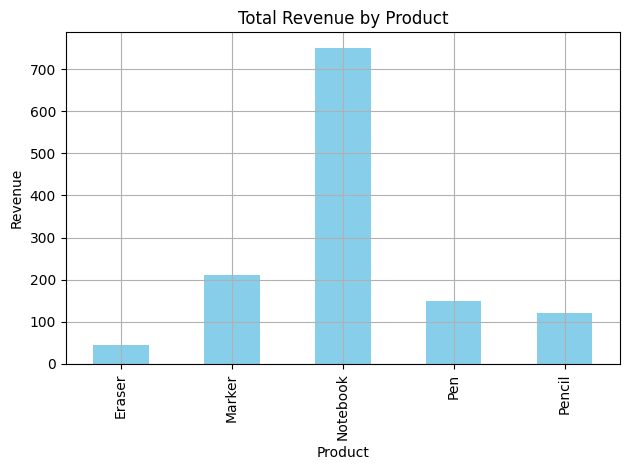

In [17]:
# Plot bar chart
df.plot(kind='bar', x='product', y='total_revenue', color='skyblue', legend=False)
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.grid(True)

In [18]:
# Show chart
plt.show()

In [19]:
plt.savefig("sales_chart.png")
from google.colab import files
files.download("sales_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>